In [2]:
import pandas as pd

In [3]:
physicians = pd.read_csv('../data/primary_care_physicians.csv')

In [4]:
physicians.head(5)

,FIPS,state,county,primary_care_physicians
0,1001,Alabama,Autauga,26.0
1,1003,Alabama,Baldwin,153.0
2,1005,Alabama,Barbour,8.0
3,1007,Alabama,Bibb,12.0
4,1009,Alabama,Blount,12.0


In [5]:
physicians['primary_care_physicians'].describe()

count    3224.00000
mean       77.92835
std       274.49887
min         0.00000
25%         4.00000
50%        11.50000
75%        39.00000
max      7412.00000
Name: primary_care_physicians, dtype: float64

In [6]:
physicians = physicians.loc[(physicians['state'] == 'Tennessee')]

In [7]:
physicians.describe()

,FIPS,primary_care_physicians
count,95.000000,95.000000
mean,47095.000000,51.042105
std,55.136195,129.311426
min,47001.000000,0.000000
25%,47048.000000,4.500000
50%,47095.000000,12.000000
75%,47142.000000,26.500000
max,47189.000000,806.000000


In [8]:
physicians.head(94)

,FIPS,state,county,primary_care_physicians
2432,47001,Tennessee,Anderson,39.0
2433,47003,Tennessee,Bedford,15.0
2434,47005,Tennessee,Benton,3.0
2435,47007,Tennessee,Bledsoe,1.0
2436,47009,Tennessee,Blount,90.0
...,...,...,...,...
2521,47179,Tennessee,Washington,226.0
2522,47181,Tennessee,Wayne,5.0
2523,47183,Tennessee,Weakley,18.0
2524,47185,Tennessee,White,9.0


In [9]:
population = pd.read_csv('../data/population_by_county.csv')

In [10]:
population.head()

,FIPS,population,county,state,urban
0,17051,21565,Fayette County,ILLINOIS,Rural
1,17107,29003,Logan County,ILLINOIS,Rural
2,17165,23994,Saline County,ILLINOIS,Rural
3,17097,701473,Lake County,ILLINOIS,Urban
4,17127,14219,Massac County,ILLINOIS,Rural


We need to split county names in the population dataframe

In [11]:
population['county'].str.rsplit(' ', n = 1, expand = True)

,0,1
0,Fayette,County
1,Logan,County
2,Saline,County
3,Lake,County
4,Massac,County
...,...,...
3197,Crockett,County
3198,Lake,County
3199,Knox,County
3200,Benton,County


In [12]:
population['county'].str.split(' County', expand = True)

,0,1
0,Fayette,
1,Logan,
2,Saline,
3,Lake,
4,Massac,
...,...,...
3197,Crockett,
3198,Lake,
3199,Knox,
3200,Benton,


In [13]:
population['state'].str.replace('TENNESSEE', 'Tennessee')

0         ILLINOIS
1         ILLINOIS
2         ILLINOIS
3         ILLINOIS
4         ILLINOIS
           ...    
3197     Tennessee
3198     Tennessee
3199     Tennessee
3200    WASHINGTON
3201    WASHINGTON
Name: state, Length: 3202, dtype: object

In [14]:
physicians = pd.merge(left = physicians,
               right = population.loc[population['state']=="TENNESSEE"][['FIPS', 'population', 'urban']], 
         on="FIPS"
        )

In [15]:
physicians.head()

,FIPS,state,county,primary_care_physicians,population,urban
0,47001,Tennessee,Anderson,39.0,76061,Urban
1,47003,Tennessee,Bedford,15.0,48292,Rural
2,47005,Tennessee,Benton,3.0,16140,Rural
3,47007,Tennessee,Bledsoe,1.0,14836,Rural
4,47009,Tennessee,Blount,90.0,129927,Urban


In [16]:
physicians['urban'].value_counts()

Rural    57
Urban    38
Name: urban, dtype: int64

In [17]:
adequate = physicians.loc[physicians['population'] / physicians['primary_care_physicians'] <= 1500]

In [65]:
adequate.describe()

,FIPS,primary_care_physicians,population
count,14.000000,14.000000,14.000000
mean,47093.857143,253.571429,245683.500000
std,62.588838,257.329395,274574.154396
min,47009.000000,22.000000,31732.000000
25%,47035.500000,43.000000,63773.750000
50%,47086.000000,164.000000,128866.000000
75%,47153.000000,386.750000,327036.500000
max,47187.000000,806.000000,936374.000000


In [18]:
physicians['residents_per_pcp'] = physicians['population'] / physicians['primary_care_physicians']

    WEEK 3 HOMEWORK:
    1.The State Health Access Data Assistance Center (SHADAC) (https://www.shadac.org/) classifies counties into three groups based on the number of residents per primary care physician. First, counties with fewer than 1500 residents per primary care physician are considered to have an "adequate" supply. Counties with at least 1500 residents but fewer than 3500 residents per primary care physician are considered to have a "moderately inadequate" supply, and counties with at least 3500 residents per primary care physician are considered to have a "low inadequate" supply. How many counties in Tennessee are in each group? 

In [19]:
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'

In [20]:
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
          (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'

In [21]:
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'

In [70]:
physicians.head()

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate


2. Use this new column to investigate if there is any relationship between a county's status as urban or rural and its SHADAC classification. Create a plot showing what you find.

In [22]:
physicians.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FIPS                     95 non-null     int64  
 1   state                    95 non-null     object 
 2   county                   95 non-null     object 
 3   primary_care_physicians  95 non-null     float64
 4   population               95 non-null     int64  
 5   urban                    95 non-null     object 
 6   residents_per_pcp        95 non-null     float64
 7   shadac_category          95 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.7+ KB


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
physicians ['shadac_category'].value_counts()

moderately inadequate    50
low inadequate           31
adequate                 14
Name: shadac_category, dtype: int64

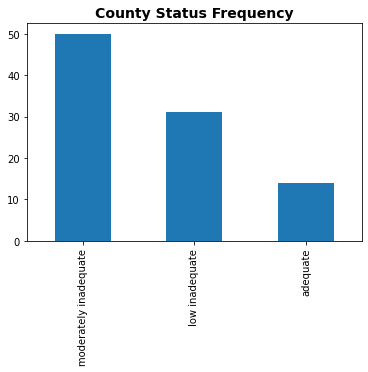

In [26]:
physicians ['shadac_category'].value_counts().plot(kind = 'bar')
plt.title('County Status Frequency'
,                              # Add a title
         fontsize = 14,
         fontweight = 'bold');

    Why is the crosstab not working???

In [25]:
pd.crosstab(physicians_merged['urban'], physicians_merged['shadac_category'],  normalize = 'index')

NameError: name 'physicians_merged' is not defined

In [26]:
physicians.groupby(["urban", "shadac_category"]).size()

urban  shadac_category      
Rural  adequate                  5
       low inadequate           21
       moderately inadequate    31
Urban  adequate                  9
       low inadequate           10
       moderately inadequate    19
dtype: int64

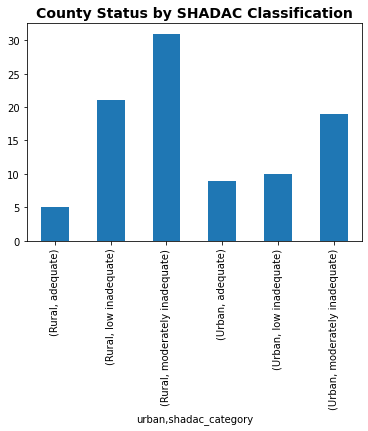

In [77]:
physicians.groupby(["urban", "shadac_category"]).size().plot(kind ='bar');
plt.title('County Status by SHADAC Classification',                              # Add a title
         fontsize = 14,
         fontweight = 'bold');

In [41]:
physicians.groupby(["urban", "shadac_category"]).size().plot(kind = bar,
                                                          stacked = True,       
                                                          color = [‘cornflowerblue’, ‘coral’, ‘pink’],   
                                                          edgecolor = ‘black’)              
plt.title(‘County Status by SHADAC classification’)                  
plt.xticks(rotation = 0);                                             

SyntaxError: invalid character in identifier (<ipython-input-41-93b22ec1f8b4>, line 3)

3. Merge the unemployment data (contained in tn_unemployment.csv) into the physicians DataFrame.

In [28]:
unemployment = pd.read_csv('../data/tn_unemployment.csv')

In [80]:
unemployment.head()

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,"Benton County, TN",Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,"Bledsoe County, TN",Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,"Blount County, TN",Mar-21,64098,61119,2979,4.6


In [29]:
unemployment['Name'].str.rsplit(',', n = 0, expand = True)

,0,1
0,Anderson County,TN
1,Bedford County,TN
2,Benton County,TN
3,Bledsoe County,TN
4,Blount County,TN
...,...,...
90,Wayne County,TN
91,Weakley County,TN
92,White County,TN
93,Williamson County,TN


In [30]:
unemployment['Name'].str.split(',', expand = True)[0]

0       Anderson County
1        Bedford County
2         Benton County
3        Bledsoe County
4         Blount County
            ...        
90         Wayne County
91       Weakley County
92         White County
93    Williamson County
94        Wilson County
Name: 0, Length: 95, dtype: object

In [42]:
unemployment['Name'] = unemployment['Name'].str.split(' ', expand = True)[0]

In [49]:
physicians_unemployment = pd.merge(left = physicians,
         right = unemployment[['Name', 'Employed', 'Unemployed', 'unemployment_rate']].rename(columns = {'Name': 'county'}))

In [50]:
physicians_unemployment.head()

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,Employed,Unemployed,unemployment_rate
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,33010,1694,4.9
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,19550,1073,5.2
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate,6305,418,6.2
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,3947,305,7.2
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,61119,2979,4.6


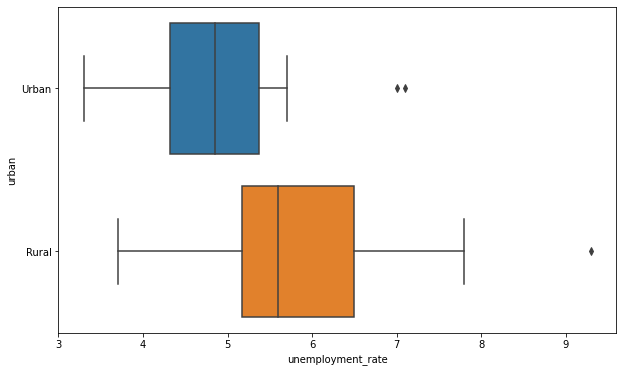

In [51]:
physicians_unemployment.groupby('urban')['unemployment_rate'].describe()
plt.figure(figsize = (10,6))
sns.boxplot(data = physicians_unemployment,
           x = 'unemployment_rate',
           y = 'urban');

In [64]:
physicians_unemployment['pcp_per_100k'] = physicians['primary_care_physicians'] / physicians['population'] * 100000

In [68]:
physicians_unemployment.plot(kind = ‘scatter’,
             x = ‘unemployment_rate’,
             y = ‘pcp_per_100k’,
             figsize = (10,6));

SyntaxError: invalid character in identifier (<ipython-input-68-b97c159cb599>, line 1)

In [66]:
physicians_unemployment[['unemployment_rate', 'pcp_per_100k']].corr()

,unemployment_rate,pcp_per_100k
unemployment_rate,1.000000,-0.262835
pcp_per_100k,-0.262835,1.000000


In [71]:
counties = pd.merge(left = counties,
                    right = physicians,
                   left_on = NAME,
                   right_on = ‘county’)
counties.head()

SyntaxError: invalid character in identifier (<ipython-input-71-98a719aa74d6>, line 4)

In [73]:
import geopandas as qpd

ModuleNotFoundError: No module named 'geopandas'